# <font color='#87B0F9'>**PYTHON PROJECT FOR DATA SCIENCE**</font>

## <font color='#94E2D5'>**FINAL PROJECT**</font>

## <font color='#B4BEFE'>**EXTRACTING AND VISUALIZING STOCK DATA**</font>

In [6]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [365]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function

In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**

In [387]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price",\
                                                                           "Historical Revenue"),\
                                                                            vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date),\
                             y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date),\
                             y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.

In [15]:
Tesla = yf.Ticker("TSLA")

<br>Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

In [279]:
tesla_data = Tesla.history(period = 'max')

<br>**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.

In [283]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.

In [32]:
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

In [37]:
html_data = requests.get(URL).text

<br>Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [41]:
WebPageSoup = BeautifulSoup(html_data, "html.parser")

<br>Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.

In [240]:
AllTables = WebPageSoup.find_all("tbody")

QTable = AllTables[1]
QTableRows = QTable.find_all('tr')

tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for i,row in enumerate(QTableRows):
    cell = row.find_all('td')
    
    date = cell[0].text
    revenue = cell[1].text
    
    tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue],})],\
                              ignore_index=True)

<br>Execute the following line to remove the comma and dollar sign from the `Revenue` column.

In [249]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',',"")

In [251]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace('$',"")

<br>Execute the following lines to remove an null or empty strings in the Revenue column.

In [256]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

<br>Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.

In [261]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data

Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.

In [267]:
GameStop = yf.Ticker("GME")

<br>Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.

In [274]:
gme_data = GameStop.history(period = 'max')

<br>**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.

In [276]:
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


## Question 4: Use Webscraping to Extract GME Revenue Data

Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.

In [290]:
URL_2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

In [292]:
html_data_2 = requests.get(URL_2).text

<br>Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.

In [295]:
WebPageSoup_2 = BeautifulSoup(html_data_2, "html.parser")

<br>Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.

In [308]:
AllTables_2 = WebPageSoup_2.find_all("tbody")

QTable_2 = AllTables_2[1]
QTableRows_2 = QTable_2.find_all('tr')

gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

for i,row in enumerate(QTableRows_2):
    cell = row.find_all('td')
    
    date = cell[0].text
    revenue = cell[1].text
    
    gme_revenue = pd.concat([gme_revenue, pd.DataFrame({"Date": [date], "Revenue": [revenue],})],\
                              ignore_index=True)

gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',',"")
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace('$',"")

<br>Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.

In [311]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph

Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.

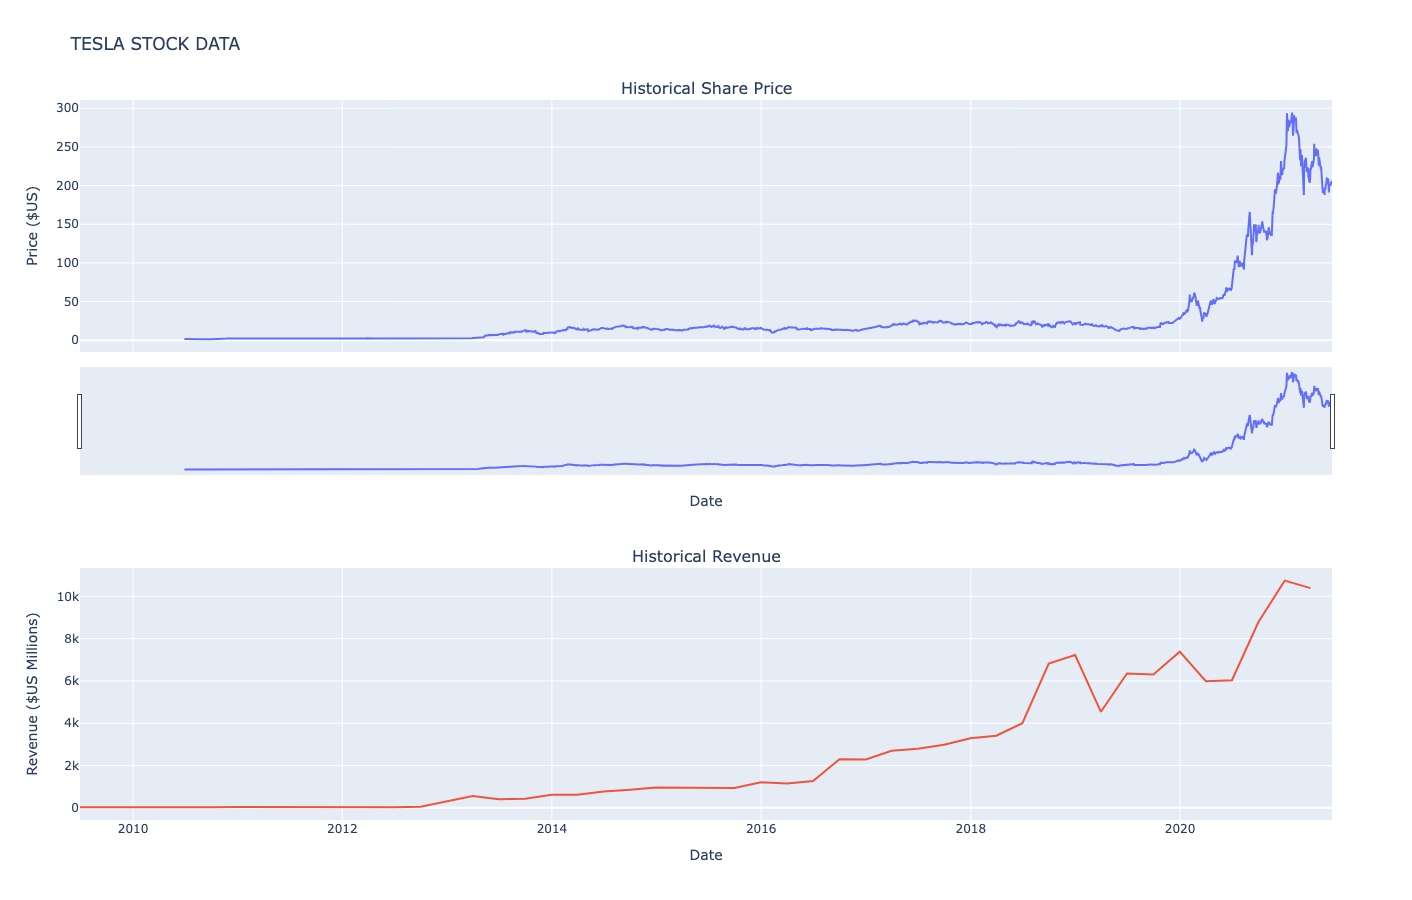

In [393]:
make_graph(tesla_data, tesla_revenue, "TESLA STOCK DATA")

## Question 6: Plot GameStop Stock Graph

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.

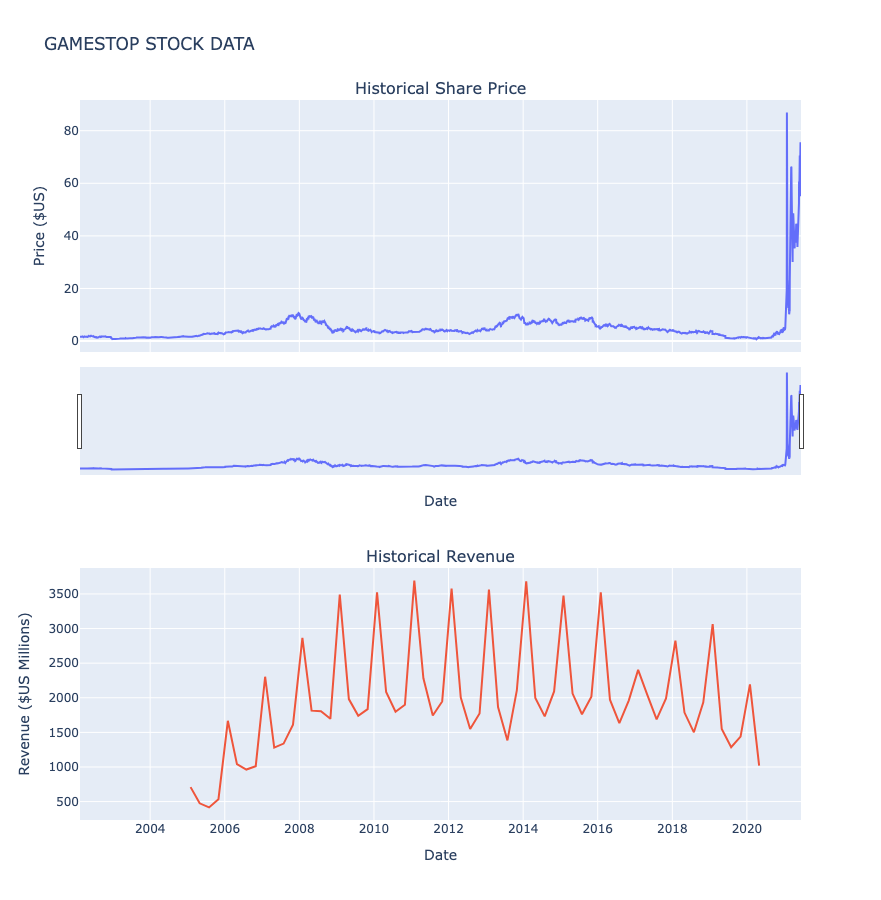

In [397]:
make_graph(gme_data, gme_revenue, "GAMESTOP STOCK DATA")

## Author
Fábio Galdino